In [50]:
# Recurrent Neural Network

In [74]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# get data from Quandl websites using your API
import quandl
quandl.ApiConfig.api_key = "GQN4nyshgdBE6gxrTyiZ"

#pd.core.common.is_list_like = pd.api.types.is_list_like

In [75]:
# using quandl API

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2005-12-31', 'lte': '2018-12-31' }, 
                        paginate=True)
data.shape

(3077, 3)

In [184]:
# import data using panda's data reader

import pandas_datareader.data as web

from datetime import datetime

start = datetime(2010, 2, 1)

end = datetime(2017, 12, 30)

#f = web.DataReader('MSFT', 'morningstar', start, end,)
#f = web.DataReader('BABA', 'google', start, end,)

tops = web.DataReader("AAPL", "morningstar",start,end)
#tops = web.DataReader("AAPL", "robinhood",start,end)


In [185]:
f=tops

In [192]:
f.head()
f1=f.reset_index() #make index become label
f1.head()
#f.dtypel
#f.Close
f.shape

(2065, 5)

In [194]:
#f.loc['2015-2-1':'2018-3-1']
f_train=f1[(f1['Date'] >= '2010-2-1') & (f1['Date'] <= '2017-6-1')]
f_test=f1[(f1['Date'] >= '2017-6-2') & (f1['Date'] <= '2017-12-30')]


In [218]:
# Importing the training set
#dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = f_train.iloc[:, 2:3].values
training_set.shape
#f_train
#f_train.iloc[:, 2:3].values


(1914, 1)

In [219]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
# predict todays stocks price base on past 60 days stocks price
X_train = []
y_train = []
for i in range(60, 1914):
    X_train.append(training_set_scaled[i-60:i, 0]) # 0-60 days stocks price to train
    y_train.append(training_set_scaled[i, 0])  # 61 day stock price will predict
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [248]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1854/1854 [==============================] - 19s 10ms/step - loss: 0.0375
Epoch 2/30
1854/1854 [==============================] - 12s 7ms/step - loss: 0.0043
Epoch 3/30
1854/1854 [==============================] - 15s 8ms/step - loss: 0.0038
Epoch 4/30
1854/1854 [==============================] - 14s 8ms/step - loss: 0.0036
Epoch 5/30
1854/1854 [==============================] - 10s 6ms/step - loss: 0.0030
Epoch 6/30
1854/1854 [==============================] - 10s 5ms/step - loss: 0.0028
Epoch 7/30
1854/1854 [==============================] - 10s 5ms/step - loss: 0.0029
Epoch 8/30
1854/1854 [==============================] - 10s 5ms/step - loss: 0.0030
Epoch 9/30
1854/1854 [==============================] - 10s 5ms/step - loss: 0.0030
Epoch 10/30
1854/1854 [==============================] - 10s 5ms/step - loss: 0.0027
Epoch 11/30
1854/1854 [==============================] - 10s 5ms/step - loss: 0.0027
Epoch 12/30
1854/1854 [==============================] - 10s 5ms/step - l

In [250]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017

real_stock_price = f_test.iloc[:, 2:3].values


In [251]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((f_train['Close'], f_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(f_test) - 60:].values

In [252]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 210):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

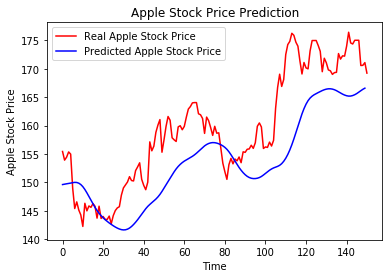

In [247]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [2]:
predicted_stock_price

NameError: name 'predicted_stock_price' is not defined

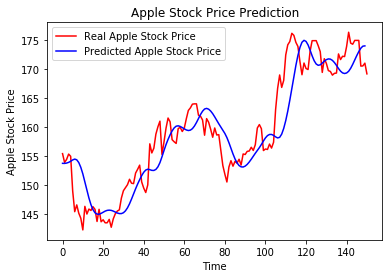

In [253]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()